<a href="https://colab.research.google.com/github/george-kan/fastai/blob/main/Pytorch_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 13.0MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 234kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [69]:
from fastai import *
from fastai.vision.all import *
import re
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms, datasets

In [2]:
path = untar_data(URLs.IMAGENETTE_160)
path.ls()

(#4) [Path('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),Path('/root/.fastai/data/imagenette2-160/.DS_Store'),Path('/root/.fastai/data/imagenette2-160/train'),Path('/root/.fastai/data/imagenette2-160/val')]

In [3]:
path.ls()

(#4) [Path('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),Path('/root/.fastai/data/imagenette2-160/.DS_Store'),Path('/root/.fastai/data/imagenette2-160/train'),Path('/root/.fastai/data/imagenette2-160/val')]

In [4]:
(path/'train'/'n03417042').ls()

(#961) [Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_12168.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_12235.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_17037.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_3107.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_23445.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_15484.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_4238.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_10796.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_21705.JPEG'),Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_28584.JPEG')...]

In [28]:
train_path = path/'train'
[folder for folder in train_path.ls() if re.search('.*/n.*$', str(folder))]

[Path('/root/.fastai/data/imagenette2-160/train/n03417042'),
 Path('/root/.fastai/data/imagenette2-160/train/n03425413'),
 Path('/root/.fastai/data/imagenette2-160/train/n02979186'),
 Path('/root/.fastai/data/imagenette2-160/train/n02102040'),
 Path('/root/.fastai/data/imagenette2-160/train/n01440764'),
 Path('/root/.fastai/data/imagenette2-160/train/n03394916'),
 Path('/root/.fastai/data/imagenette2-160/train/n03028079'),
 Path('/root/.fastai/data/imagenette2-160/train/n03888257'),
 Path('/root/.fastai/data/imagenette2-160/train/n03000684'),
 Path('/root/.fastai/data/imagenette2-160/train/n03445777')]

In [32]:
x = [1,2,3]
y = [1,1,1]

x, y = [7], [9]

In [ ]:
re.sub('.*/', '', '/root/.fastai/data/imagenette2-160/train/n03417042')

'n03417042'

In [40]:
def get_folder_data(path):
    label = re.sub('.*/', '', str(path))
    return path.ls(), [label]*len(path.ls())

In [41]:
xa, xo = get_folder_data((path/'train/n03445777'))

951

In [ ]:
label = re.sub('.*/', '', str((path/'train/n03445777')))
label

'n03445777'

In [ ]:
len((path/'train/n03445777').ls())

951

In [ ]:
label*911

'n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777n03445777

In [106]:
class myDatasetClass(Dataset):
    def __init__(self, img_path, transform=None, target_transform=None):
        folders = [folder for folder in img_path.ls() if re.search('.*/n.*$', str(folder))]
        self.images, self.labels = [], []
        for folder in folders:
            tmp_images, tmp_labels = get_folder_data(folder)
            self.images += tmp_images
            self.labels += tmp_labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = Image.open(str(self.images[idx]))
        image = image.convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        #sample = {"image":image, "label":label}
        return image, label

In [118]:
composed = transforms.Compose([transforms.Resize(256), transforms.RandomCrop(224),  transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
train_dataloader = DataLoader(myDatasetClass(train_path, transform = composed), batch_size=64, shuffle=True)

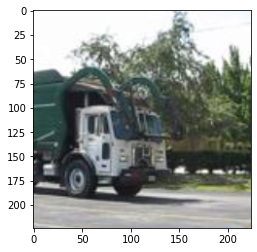

Label: n03417042


In [125]:
train_features, train_labels = next(iter(train_dataloader))
#xa = next(iter(train_dataloader))
img = train_features[0].permute(1,2,0).numpy()
label = train_labels[0]
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img = std * img + mean
img = np.clip(img, 0, 1)

plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [113]:
train_features[0].permute(1,2,0).shape

torch.Size([224, 224, 3])

AttributeError: ignored

In [122]:
import torchvision.models as models
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth
